<a href="https://colab.research.google.com/github/rsnipv/hec-bjj/blob/main/Copy_of_HEC_2022_day_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [3]:
# numerical computation
import numpy as np

# dataframes
import pandas as pd 

# viz
import seaborn as sns
import matplotlib.pyplot as plt

# ipywidgets for interaction in notebook
!pip install ipywidgets
import ipywidgets as widgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 20.3 MB/s 


# Univariate Linear Regression

Let's open the mpg dataset from seaborn and let's try to predict the weight of a car :)

Why Linear Regressions ?


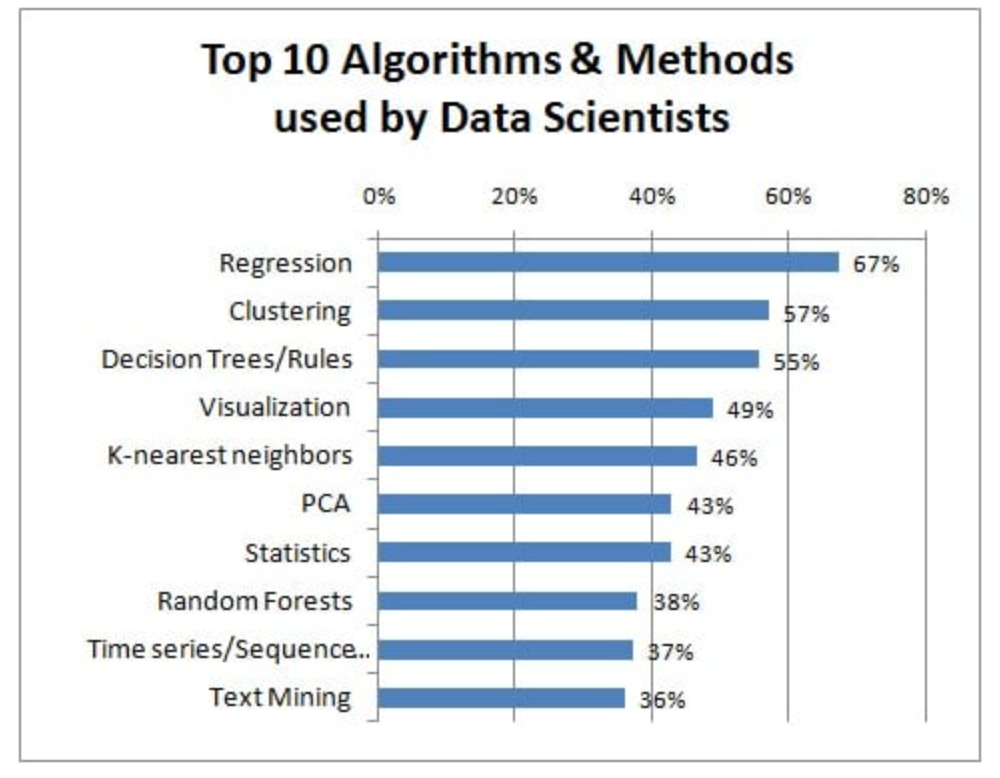

*   Interpretable
*   Easy to implement



In [4]:
# load mpg dataset
mpg = sns.load_dataset("mpg")

# drop missing values
mpg = mpg.dropna()

# check out first rows
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


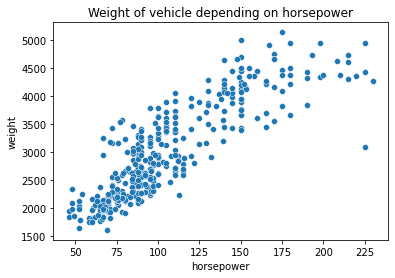

In [5]:
# let's make a scatterplot of the car weight based on it's horsepower
sns.scatterplot(x='horsepower', y='weight', data=mpg)
plt.title('Weight of vehicle depending on horsepower')
plt.show()

Now we want to find the line $y = a x + b$ which bests summarises this graph, with 
*   $y$ being the vehicle weight
*   $x$ being the horsepower
*   $a$ being the slope (or coef)
*   $b$ being the intercept.



In [6]:
xv = np.linspace(mpg.horsepower.min(), mpg.horsepower.max(), 100)
@widgets.interact(a=(0, 30), b=(0, 2000))
def plot_line(a=15, b=1000):
  sns.scatterplot(x='horsepower', y='weight', data=mpg)
  plt.plot(xv, a*xv+b, color='orange')
  plt.title('Weight of vehicle depending on horsepower')

interactive(children=(IntSlider(value=15, description='a', max=30), IntSlider(value=1000, description='b', max…

In [7]:
# note that the above function has been created !!
plot_line

<function __main__.plot_line(a=15, b=1000)>

You can also check out the same kind of interactivity [here](https://setosa.io/ev/ordinary-least-squares-regression/).

What is the best possible line ?

A possibility is to rely on mathematical optimization and find $(a, b)$ such that the total sum of squares is minimized:

$$\hat{a}, \hat{b} = \text{min}_{(a, b)} \sum_{i=1}^{n} (y_i - (a x_i + b))^2. $$

The ```.regplot()``` method finds for us those coefficients and directly plots the line.

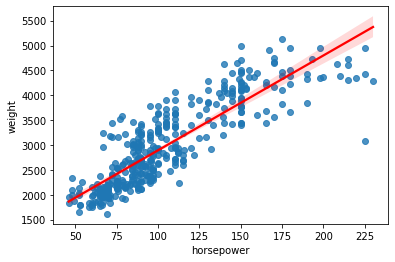

In [8]:
sns.regplot(x='horsepower', y='weight', data=mpg, line_kws={'color':'red'})

Now let's find the equation for this line with the library sklearn

In [9]:
# import linear regression module from scikit-learn
from sklearn.linear_model import LinearRegression

# define your x & y
X = mpg[['horsepower']] # <!> the double-brackets is needed to keep this in dataframe format ;)
Y = mpg['weight']

# instancite model
lr = LinearRegression() 

# fit model to find the the a & b to minize the error
lr.fit(X,Y) 

# will return an array of your predicted values
lr.predict(X) 

# estimated coefficients
print(f'a = {lr.coef_} | b = {lr.intercept_}')

a = [19.07816155] | b = 984.500326770238


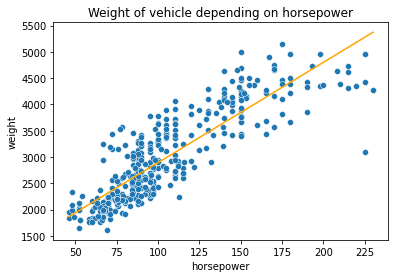

In [10]:
plot_line(a=lr.coef_, b=lr.intercept_)

How to check if my model is robust?

In [11]:
lr.score(X,Y) # R2 score : proportion of the graph variability explained by the fitted line [0-1]

0.7474254996898199

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, lr.predict(X)) # mean squared error, needs to be as low as possible [0,+Infty]

181763.7708797769

# Multivariate Linear Regression

Ok, but what if we want to use **both** horsepower and cylinders to predict the weight?

The equation will now be:

$$ y = a_1 x_1 + a_2 x_2 + b $$

*   $y$ being the vehicle weight
*   $a_1$ being the coefficient of the horsepower $x_1$
*   $a_2$ being the coefficient of the cylinders $x_2$
*   $b$ being the intercept.



The process remains the same, but with more columns added to X 😀

In [13]:
#define your x & y
X_mv = mpg[['horsepower','cylinders']]
Y_mv = mpg['weight']

# instanciation
lr_mv = LinearRegression()

#fit model to find (a_1, a_2, b) to minize the error
lr_mv.fit(X_mv,Y_mv) 

# will return an array of your predicted values
lr_mv.predict(X_mv) 

# get coefficients
print(f"Coefficients \n a_1 = {lr_mv.coef_[0]} \n a_2 = {lr_mv.coef_[1]} \n b = {lr_mv.intercept_}")

Coefficients 
 a_1 = 8.231070482824373 
 a_2 = 290.3564245855003 
 b = 528.8767113558115


In [14]:
# check R2 score
lr_mv.score(X_mv,Y_mv)

0.8458154043882244

In [15]:
# check mean squared error
mean_squared_error(Y_mv, lr_mv.predict(X_mv))

110958.04792468298

And to show you what it looks like in 3D :)

In [16]:
# 3D axes module
from mpl_toolkits.mplot3d import Axes3D

# define grid
x_surf, y_surf = np.meshgrid(np.linspace(mpg.horsepower.min(), mpg.horsepower.max(), 100),np.linspace(mpg.cylinders.min(), mpg.cylinders.max(), 100))

# compute surface
onlyX = pd.DataFrame({'Horsepower': x_surf.ravel(), 'Cylinders': y_surf.ravel()})
fittedY = lr_mv.predict(onlyX)

@widgets.interact(angle=(-180, 180))
def plot_3D_line(angle=-70):
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(mpg['horsepower'],mpg['cylinders'],mpg['weight'],c='red', marker='o', alpha=0.5)
  ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
  ax.set_xlabel('horsepower')
  ax.set_ylabel('cylinders')
  ax.set_zlabel('weight')
  ax.view_init(10, angle)
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cylinders
- Horsepower
Feature names seen at fit time, yet now missing:
- cylinders
- horsepower

  warnings.warn(message, FutureWarning)


interactive(children=(IntSlider(value=-70, description='angle', max=180, min=-180), Output()), _dom_classes=('…

# Exercices

## Ex 1

Load the dataset "tips" from seaborn using the load_dataset function and drop na values


In [17]:
tips = sns.load_dataset("tips")
tips = tips.dropna()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Ex 2

Using a heatmap, show the correlation between each numerical features
Which feature is the most correlated to the tip feature?

hint : use the .corr() method to get all correlations

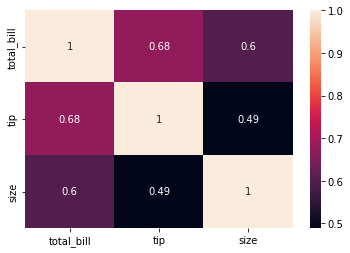

In [18]:
sns.heatmap(tips.corr(), cbar=True, annot=True)

## Ex 3

Using a scatterplot, plot the tip (y-axis) feature on the total_bill feature (x-axis), give it a title and make it size (10,10)

<Figure size 720x720 with 0 Axes>

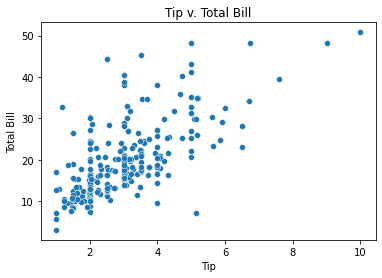

<Figure size 720x720 with 0 Axes>

In [19]:
sns.scatterplot(x="tip", y="total_bill", data=tips);
plt.title("Tip v. Total Bill");
plt.ylabel("Total Bill");
plt.xlabel("Tip");
plt.figure(figsize=(10,10))

## Ex 4

Using a regplot, plot the tip (y-axis) feature on the total_bill feature (x-axis) give it a title and make it size (10,10)

<Figure size 720x720 with 0 Axes>

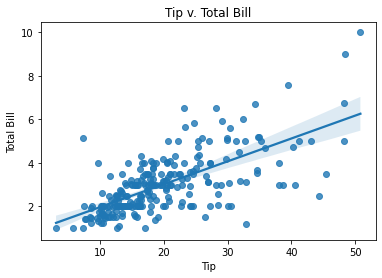

<Figure size 720x720 with 0 Axes>

In [20]:
sns.regplot(y="tip", x="total_bill", data=tips);
plt.title("Tip v. Total Bill");
plt.ylabel("Total Bill");
plt.xlabel("Tip");
plt.figure(figsize=(10,10))

## Ex 5

Using a linear regression model, instantiate the model, fit it and find the coef and intecept of a regression between tip (Y) and total_bill (X)

In [23]:
from sklearn.linear_model import LinearRegression

X = tips[('total_bill')]
y = tips[('tip')]

lr = LinearRegression
lr = lr.fit(X,y)
lr.coef_,lr.intercept_

TypeError: ignored

## Ex 6

What's the R2 of this model? What is its mean_squared_error?

In [26]:
from sklearn.metrics import mean_squared_error
lr.score(x,Y)
lr_tip.score(x,Y).mean_squared_error()

TypeError: ignored

## Ex 7

Using a scatter plot plot the tip feature against the total_bill feature. Then plot the line you get from the coef and intercept found from your model above. Give it a title, plot the line in another color of the scatter one and give it labels.

AttributeError: ignored

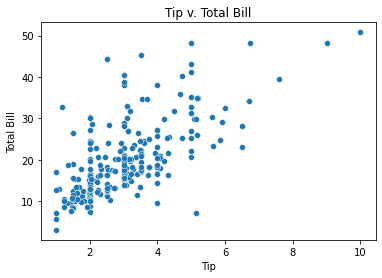

In [30]:
sns.scatterplot(x="tip", y="total_bill", data=tips);
plt.title("Tip v. Total Bill");
plt.ylabel("Total Bill");
plt.xlabel("Tip");
import sklearn.metrics import mean_squared_error
plt.score(x,Y).style("red")


## Ex 8

Let's try with other features!
Add a 'Sex encoded' column to your dataframe that transforms 'Female' in 0 and 'Male' in 1 from the sex feature
Add a 'Smoker encoded' column to your dataframe that transforms 'Yes' in 0 and 'No' in 1 from the smoker feature

In [ ]:
#code
tips['sex encoded']=tips.loc[:'sex']
tips['smoker encoded']=tips.loc[:'smoker']

tips['sex encoded']=tips.sex.replace['Female',0].replace['Male',1]
tips['smoker encoded']=tips.smoker.map({'Yes':0,'No':1})
tips

ValueError: ignored

## Ex 9

Using a linear regression model, instantiate the model, fit it and find the coef and intecept of a regression between tip (Y) and total_bill, Sex_encoded & Smoker_encoded (X)

In [ ]:
#code

## Ex 10

What's the R2 of this model? What is its mean_squared_error? How is it compared to our previous score?

In [ ]:
#code